<a href="https://colab.research.google.com/github/ann-e888/MwDM_zaliczenie_PretrainedModels/blob/main/Pretrained_Models_SiedlarzG%C5%82ogowski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#pip install datasets

In [36]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, Subset
from tqdm import tqdm
import matplotlib.pyplot as plt

dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

## Image Transform

In [37]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [38]:
from PIL import Image
img = Image.open('labrador.jpg')

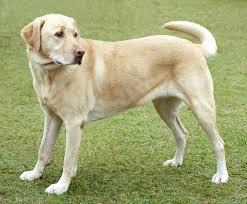

In [39]:
img

In [40]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [41]:
with open('imagenet1000_clsidx_to_labels.txt') as f:
  classes = [line.strip() for line in f.readlines()]

In [42]:
labels = classes

In [43]:
labels

["{0: 'tench, Tinca tinca',",
 "1: 'goldfish, Carassius auratus',",
 "2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',",
 "3: 'tiger shark, Galeocerdo cuvieri',",
 "4: 'hammerhead, hammerhead shark',",
 "5: 'electric ray, crampfish, numbfish, torpedo',",
 "6: 'stingray',",
 "7: 'cock',",
 "8: 'hen',",
 "9: 'ostrich, Struthio camelus',",
 "10: 'brambling, Fringilla montifringilla',",
 "11: 'goldfinch, Carduelis carduelis',",
 "12: 'house finch, linnet, Carpodacus mexicanus',",
 "13: 'junco, snowbird',",
 "14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',",
 "15: 'robin, American robin, Turdus migratorius',",
 "16: 'bulbul',",
 "17: 'jay',",
 "18: 'magpie',",
 "19: 'chickadee',",
 "20: 'water ouzel, dipper',",
 "21: 'kite',",
 "22: 'bald eagle, American eagle, Haliaeetus leucocephalus',",
 "23: 'vulture',",
 "24: 'great grey owl, great gray owl, Strix nebulosa',",
 "25: 'European fire salamander, Salamandra salamandra',",
 "26: 'c

## AlexNet vs ResNet on single image

In [44]:
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [45]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [46]:
out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


In [47]:
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print(labels[index[0]], percentage[index[0]].item())

208: 'Labrador retriever', 51.02659606933594


In [48]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[("208: 'Labrador retriever',", 51.02659606933594),
 ("176: 'Saluki, gazelle hound',", 17.186176300048828),
 ("243: 'bull mastiff',", 7.933097839355469),
 ("207: 'golden retriever',", 5.844698429107666),
 ("172: 'whippet',", 1.645408034324646)]

In [49]:
resnet = models.resnet101(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [50]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [51]:
out = resnet(batch_t)

_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(labels[idx], percentage[idx].item()) for idx in indices[0][:10]]

[("208: 'Labrador retriever',", 22.700544357299805),
 ("207: 'golden retriever',", 9.360894203186035),
 ("273: 'dingo, warrigal, warragal, Canis dingo',", 7.94541597366333),
 ("227: 'kelpie',", 5.522330284118652),
 ("168: 'redbone',", 4.5927276611328125),
 ("248: 'Eskimo dog, husky',", 3.7315778732299805),
 ("166: 'Walker hound, Walker foxhound',", 3.1441709995269775),
 ("167: 'English foxhound',", 2.7287726402282715),
 ("209: 'Chesapeake Bay retriever',", 2.7037763595581055),
 ("250: 'Siberian husky',", 2.6907591819763184)]

## AlexNet vs ResNet on CIFAR10 dataset

In [52]:
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
#test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False) #if you want to test on a whole dataset

Files already downloaded and verified


In [53]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

In [54]:
subset_indices = list(range(600))  #indices for the first n images
subset_dataset = Subset(test_dataset, subset_indices)

#create DataLoader for the subset of the dataset
test_loader = DataLoader(subset_dataset, batch_size=1, shuffle=False)

In [55]:
#load pretrained models
alexnet = models.alexnet(pretrained=True)
resnet = models.resnet101(pretrained=True)

In [56]:
#modify the final layer for CIFAR-10 (10 classes)
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, 10)
resnet.fc = nn.Linear(resnet.fc.in_features, 10)

In [57]:
#set models to evaluation mode
alexnet.eval()
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [58]:
top1_errors = []  #store images and results for top1 errors
top5_errors = []  #store images and results for top5 errors

for inputs, labels in tqdm(test_loader):
    true_label = labels[0].item() #labels[0] because the batch size is 1

    #alexnet predictions
    out_alexnet = alexnet(inputs) #forward pass, raw logits output
    percentage_alexnet = torch.nn.functional.softmax(out_alexnet, dim=1)[0] * 100 #take the first row from output of size [batch size, num_classes] and calculate probabilties
    _, index_alexnet_top1 = torch.max(out_alexnet, 1) #top1 predicted index
    indices_alexnet_top5 = torch.argsort(out_alexnet, dim=1, descending=True)[0][:5] #top5 predicted indices

    #resnet predictions
    out_resnet = resnet(inputs)
    percentage_resnet = torch.nn.functional.softmax(out_resnet, dim=1)[0] * 100
    _, index_resnet_top1 = torch.max(out_resnet, 1)
    indices_resnet_top5 = torch.argsort(out_resnet, dim=1, descending=True)[0][:5]

    #check for top1 errors
    #alexnet
    if index_alexnet_top1[0].item() != true_label:
        top1_errors.append({
            "image": inputs[0],
            "true_label": cifar10_classes[true_label],
            "predicted_label": cifar10_classes[index_alexnet_top1[0].item()],
            "confidence": percentage_alexnet[index_alexnet_top1[0]].item(),
            "model": "AlexNet"
        })
    #resnet
    if index_resnet_top1[0].item() != true_label:
        top1_errors.append({
            "image": inputs[0],
            "true_label": cifar10_classes[true_label],
            "predicted_label": cifar10_classes[index_resnet_top1[0].item()],
            "confidence": percentage_resnet[index_resnet_top1[0]].item(),
            "model": "ResNet"
        })

    #check for top5 errors
    if true_label not in indices_alexnet_top5:
        top5_errors.append({
            "image": inputs[0],
            "true_label": cifar10_classes[true_label],
            "predicted_labels": [cifar10_classes[idx.item()] for idx in indices_alexnet_top5],
            "model": "AlexNet"
        })
    if true_label not in indices_resnet_top5:
        top5_errors.append({
            "image": inputs[0],
            "true_label": cifar10_classes[true_label],
            "predicted_labels": [cifar10_classes[idx.item()] for idx in indices_resnet_top5],
            "model": "ResNet"
        })


100%|██████████| 600/600 [04:11<00:00,  2.38it/s]


In [59]:
total_samples = len(test_dataset)

top1_error_rate_alexnet = len([e for e in top1_errors if e["model"] == "AlexNet"]) / total_samples * 100
top1_error_rate_resnet = len([e for e in top1_errors if e["model"] == "ResNet"]) / total_samples * 100

top5_error_rate_alexnet = len([e for e in top5_errors if e["model"] == "AlexNet"]) / total_samples * 100
top5_error_rate_resnet = len([e for e in top5_errors if e["model"] == "ResNet"]) / total_samples * 100

In [60]:
print(f"AlexNet Top-1 Error Rate: {top1_error_rate_alexnet:.2f}%")
print(f"ResNet Top-1 Error Rate: {top1_error_rate_resnet:.2f}%")
print(f"AlexNet Top-5 Error Rate: {top5_error_rate_alexnet:.2f}%")
print(f"ResNet Top-5 Error Rate: {top5_error_rate_resnet:.2f}%")

AlexNet Top-1 Error Rate: 5.61%
ResNet Top-1 Error Rate: 5.10%
AlexNet Top-5 Error Rate: 3.24%
ResNet Top-5 Error Rate: 2.73%


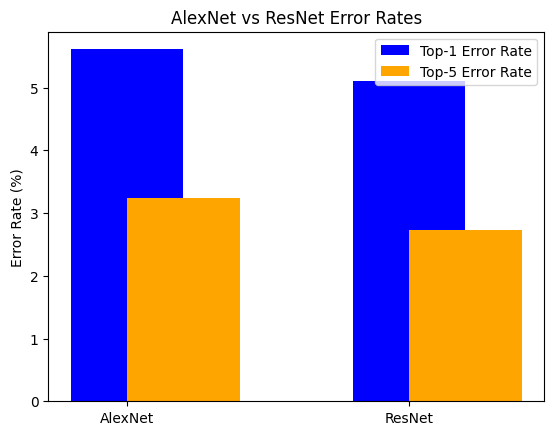

In [61]:
models = ['AlexNet', 'ResNet']
top1_error_rates = [top1_error_rate_alexnet, top1_error_rate_resnet]
top5_error_rates = [top5_error_rate_alexnet, top5_error_rate_resnet]

x = range(len(models))

plt.bar(x, top1_error_rates, width=0.4, label='Top-1 Error Rate', color='blue', align='center')
plt.bar(x, top5_error_rates, width=0.4, label='Top-5 Error Rate', color='orange', align='edge')

plt.xticks(x, models)
plt.ylabel('Error Rate (%)')
plt.title('AlexNet vs ResNet Error Rates')
plt.legend()

plt.show()